In [32]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import torch
import numpy as np
import PIL
from PIL import Image

In [7]:
data = pd.read_csv('house_classes.csv')

In [8]:
data.head(1)

,Unnamed: 0,rooms,baths,square,post,price,id,image,img_path,target
0,0,4,4.0,4053,85255,869500,0,[[[159 122 96]\n [166 132 105]\n [166 139 1...,img/1.png,"(839000.0, 914750.0]"


In [33]:
def convert_image(img_path):
    image = Image.open(img_path)
    image_array = np.array(image)
    return image_array

In [34]:
data['img'] = data['img_path'].apply(lambda x: convert_image(x))

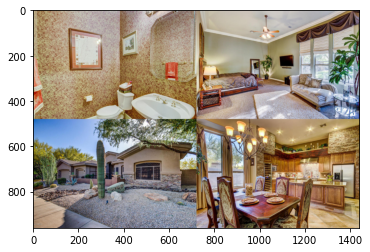

In [36]:
plt.imshow((data['img'].iloc[0]))
plt.show()

In [41]:
data_new = np.asanyarray(data['img'])

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

In [88]:
data_dir = pathlib.Path('img')

In [89]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 547 files belonging to 20 classes.
Using 438 files for training.


In [90]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 547 files belonging to 20 classes.
Using 109 files for validation.


In [91]:
classnames = list(data.target.unique())

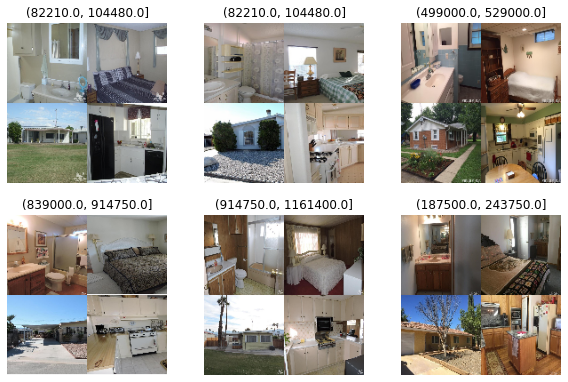

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")

In [93]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=20,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [94]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(20, activation='softmax'))

In [95]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 20)                10260     
                                                                 
Total params: 24,647,060
Trainable params: 1,059,348
Non-trainable params: 23,587,712
_________________________________________________________________


In [96]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
14/14 [==============================] - 18s 559ms/step - loss: 3.8386 - accuracy: 0.0525 - val_loss: 3.3227 - val_accuracy: 0.1101
Epoch 2/30
14/14 [==============================] - 11s 506ms/step - loss: 2.6263 - accuracy: 0.2329 - val_loss: 3.0266 - val_accuracy: 0.0734
Epoch 3/30
14/14 [==============================] - 9s 417ms/step - loss: 2.2006 - accuracy: 0.3539 - val_loss: 3.1380 - val_accuracy: 0.1009
Epoch 4/30
14/14 [==============================] - 10s 431ms/step - loss: 1.8339 - accuracy: 0.4863 - val_loss: 3.1577 - val_accuracy: 0.1009
Epoch 5/30
14/14 [==============================] - 10s 430ms/step - loss: 1.4812 - accuracy: 0.6598 - val_loss: 3.0204 - val_accuracy: 0.0917
Epoch 6/30
14/14 [==============================] - 9s 404ms/step - loss: 1.2048 - accuracy: 0.7352 - val_loss: 3.2822 - val_accuracy: 0.1101
Epoch 7/30
14/14 [==============================] - 9s 418ms/step - loss: 0.9817 - accuracy: 0.8242 - val_loss: 3.2294 - val_accuracy: 0.1009
Ep

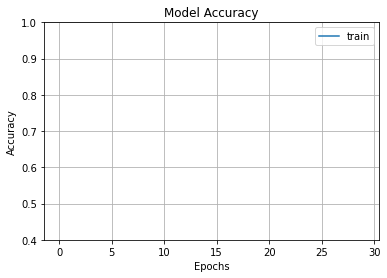

In [102]:
fig1 = plt.gcf()
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [97]:
test_img = (data['img_path'].iloc[23])
test_class = (data['target'].iloc[23])
image=cv2.imread(test_img)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [98]:
pred=resnet_model.predict(image)

In [99]:
output_class=classnames[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is (200000.0, 300000.0]


In [100]:
test_class

'(1161400.0, 1499422.078]'